#Régression Linéaire From Scratch:
Ce notebook implémente une régression linéaire en Python sans utiliser de bibliothèques de machine learning .

## Étapes :
1. Génération des données simulées.
2. Solution analytique (équation normale).
3. Descente de gradient (full-batch, stochastic, mini-batch).
4. Visualisation des résultats.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# equation normal

x=2*np.random.rand(100,1)
x_new=np.c_[np.ones((100,1)),x]
print(x.shape)
print(x_new.shape)


#np.random.rand(100,1) pour le bruit
y= 12+ 24* x + np.random.rand(100,1)
print(y.shape)

# solution analytique
thetaa=np.linalg.inv(x_new.T.dot(x_new)).dot(x_new.T).dot(y)
print(thetaa)

(100, 1)
(100, 2)
(100, 1)
[[12.38948194]
 [24.11010082]]


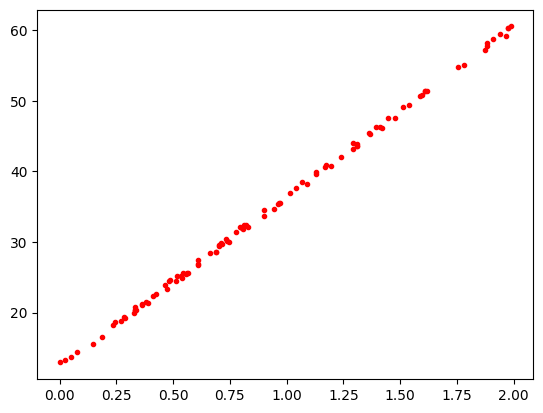

In [6]:
#visualisation
plt.plot(x,y,'.r')
plt.show()

In [10]:
#full batch gradient descent
lr=0.1
thetaa=np.random.rand(2,1)
n_iter=100
m=100
for i in range(n_iter):
   gradient=2/m*x_new.T.dot(x_new.dot(thetaa)-y)
   thetaa=thetaa-lr*gradient
print(thetaa)

[[12.67454871]
 [23.84543374]]


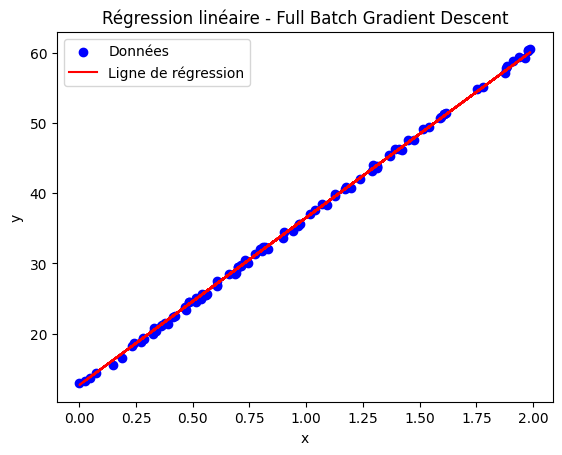

In [11]:
# visualisation
plt.scatter(x, y, color="blue", label="Données")

# Prédictions basées sur les paramètres thetaa après descente de gradient
y_pred = x_new.dot(thetaa)

# Tracer la ligne de régression
plt.plot(x, y_pred, color="red", label="Ligne de régression")


plt.title("Régression linéaire - Full Batch Gradient Descent")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()


plt.show()


In [8]:
#stochastique
n_epochs = 50

to, t1 = 5, 50 # hyperparamètres d'échéancier d'apprentissage
def learning_schedule (t):
  return to / (t + t1)

theta = np.random.randn(2,1) # initialisation aléatoire

for epoch in range (n_epochs):
    for i in range (m):
      random_index = np.random.randint(m)

      xi = x_new[random_index:random_index+1]
      yi = y[random_index:random_index+1]
      gradients = 2* xi.T.dot(xi.dot(theta) - yi)
      eta = learning_schedule(epoch * m + i)
      theta = theta - eta *gradients
print(theta)
print(xi)
#cette sélection aléatoire est un bon moyen d’échapper à un minimum local, mais n’est pas satisfaisante car l’algorithme ne va jamais s’arrêter au minimum.

[[12.41112382]
 [24.10391535]]
[[1.         0.81095738]]


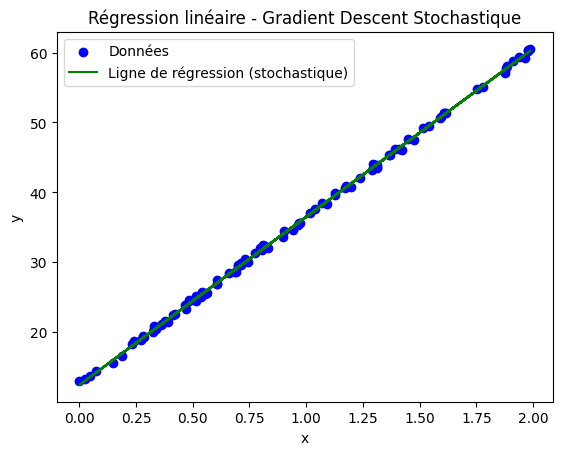

In [12]:
# visualisation
plt.scatter(x, y, color="blue", label="Données")

# Prédictions basées sur les paramètres theta après descente de gradient stochastique
y_pred_stochastic = x_new.dot(theta)


plt.plot(x, y_pred_stochastic, color="green", label="Ligne de régression (stochastique)")


plt.title("Régression linéaire - Gradient Descent Stochastique")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()


plt.show()


In [9]:
epochs = 100
learning_rate = 0.1

# paramètres theta
theta = np.random.randn(2, 1)
batch_size =20
# MINI BATCH
for epoch in range(epochs):
    shuffled_indices = np.random.permutation(m)
    x_b_shuffled = x_new[shuffled_indices]
    Y_shuffled = y[shuffled_indices]
    for i in range(0, m, batch_size):
        xi = x_b_shuffled[i:i+batch_size]
        yi = Y_shuffled[i:i+batch_size]
        gradients = (2/batch_size) * xi.T.dot(xi.dot(theta) - yi)
        theta = theta - learning_rate * gradients
theta

array([[12.38357536],
       [24.09979393]])

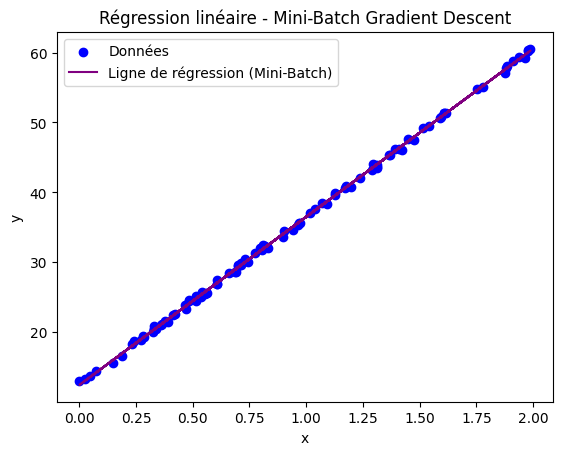

In [13]:
# visualisation
plt.scatter(x, y, color="blue", label="Données")

# Prédictions basées sur les paramètres theta après descente de gradient mini-batch
y_pred_minibatch = x_new.dot(theta)


plt.plot(x, y_pred_minibatch, color="purple", label="Ligne de régression (Mini-Batch)")


plt.title("Régression linéaire - Mini-Batch Gradient Descent")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()


plt.show()
